I typically use Python for my data analysis. However, there are many packages which exist only in R. RPy2 allows interaction between R and Python. The installation on OSX wasn't straighforward. The first part of this post explains how I was able to install RPy2 on OSX. In the next part, I give some sample usage.

### Installing RPY2

I assume that R was installed to the default location. First, we need to edit 
```
/opt/local/Library/Frameworks/R.framework/Resources/etc/Makeconf
```

and change the following line 

```
LIBS =  -lpcre -lbz2 -lz -lm -liconv -licuuc -licui18n
``` 

TO

```
LIBS = -lpcre -lbz2 -lz -lm -liconv
```

Next, I used Conda to install rpy2 following instructions on [this Stack Overflow question](http://stackoverflow.com/questions/24987932/installing-rpy2-on-mac-osx-with-anaconda-python-3-4-and-r-3-1-installed-via-macp).

```bash
conda skeleton pypi rpy2
conda build rpy2
conda install rpy2 --use-local
```

### Sample usage

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.DataFrame(np.random.randn(10,5))

In [11]:
df.head()

,0,1,2,3,4
0,-0.109199,-0.484883,0.811473,1.686629,-0.830384
1,-0.834123,-1.285800,1.410968,-0.725307,1.072794
2,0.290833,1.778150,0.638011,-0.811454,-0.135623
3,-0.394996,-0.240359,-0.298879,0.659799,-0.228504
4,0.784954,-0.813065,-1.286696,-0.008936,-1.155361


In [12]:
df.describe()

,0,1,2,3,4
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,-0.096310,0.081223,-0.118384,0.321359,-0.476276
std,1.124557,0.941040,0.876442,0.812371,0.937087
min,-1.836006,-1.285800,-1.286696,-0.811454,-2.336085
25%,-0.724341,-0.460527,-0.846898,-0.170075,-0.868087
50%,-0.228049,-0.236871,-0.282755,0.295095,-0.421804
75%,0.488334,0.805611,0.545028,0.740733,-0.158843
max,2.149441,1.778150,1.410968,1.686629,1.072794


In [13]:
from rpy2.robjects import pandas2ri
pandas2ri.activate()

Creating an R data drame corresponding to `df`

In [14]:
rdf = pandas2ri.py2ri(df)

In [15]:
rdf

<DataFrame - Python:0x1141ebf38 / R:0x1009855b0>
[Array, Array, Array, Array, Array]
  X0: <class 'rpy2.robjects.vectors.Array'>
  <Array - Python:0x1141ed368 / R:0x1120a2548>
[-0.109199, -0.834123, 0.290833, ..., -1.221273, 0.554167, 2.149441]
  X1: <class 'rpy2.robjects.vectors.Array'>
  <Array - Python:0x1141ed2d8 / R:0x1120a3808>
[-0.484883, -1.285800, 1.778150, ..., 0.909395, -0.387461, -0.233383]
  X2: <class 'rpy2.robjects.vectors.Array'>
  <Array - Python:0x1141ed3b0 / R:0x1120c81f0>
[0.811473, 1.410968, 0.638011, ..., -0.940421, -0.566326, -0.951415]
  X3: <class 'rpy2.robjects.vectors.Array'>
  <Array - Python:0x1141ed488 / R:0x1121987f0>
[1.686629, -0.725307, -0.811454, ..., 0.466500, 1.278749, -0.223788]
  X4: <class 'rpy2.robjects.vectors.Array'>
  <Array - Python:0x1141ed5a8 / R:0x11380a958>
[-0.830384, 1.072794, -0.135623, ..., -0.479923, -2.336085, -0.363685]

In [16]:
print(rdf)

          X0         X1         X2           X3         X4
0 -0.1091990 -0.4848830  0.8114729  1.686629050 -0.8303842
1 -0.8341230 -1.2858001  1.4109684 -0.725307160  1.0727939
2  0.2908333  1.7781499  0.6380108 -0.811454278 -0.1356233
3 -0.3949959 -0.2403594 -0.2988791  0.659799210 -0.2285036
4  0.7849540 -0.8130649 -1.2866963 -0.008935847 -1.1553609
5 -1.8360065  0.7432235 -0.2666311  0.767711423  0.5746690
6 -0.3468995  0.8264074  0.2660812  0.123690417 -0.8806542
7 -1.2212734  0.9093955 -0.9404215  0.466499724 -0.4799235
8  0.5541671 -0.3874608 -0.5663260  1.278748625 -2.3360854
9  2.1494409 -0.2333825 -0.9514155 -0.223788233 -0.3636848



Now, let us perform some `R` operations on the dataframe

In [17]:
import rpy2.robjects as robjects

From the `rpy2` documentation, 

>The object r in rpy2.robjects represents the running embedded R process.
If familiar with R and the R console, r is a little like a communication channel from Python to R.



### Calling basic `R` functions

* Let us now compute the `head` of our R `dataframe` rdf

In [33]:
head_df = robjects.r['head']

In [34]:
print(head_df(rdf, 2))

         X0        X1        X2         X3         X4
0 -0.109199 -0.484883 0.8114729  1.6866291 -0.8303842
1 -0.834123 -1.285800 1.4109684 -0.7253072  1.0727939



* Now, let us find the description of the dataframe

In [37]:
r_summary =  robjects.r['summary'](rdf)
print(r_summary)

       X0                 X1                 X2                X3         
 Min.   :-1.83601   Min.   :-1.28580   Min.   :-1.2867   Min.   :-0.8115  
 1st Qu.:-0.72434   1st Qu.:-0.46053   1st Qu.:-0.8469   1st Qu.:-0.1701  
 Median :-0.22805   Median :-0.23687   Median :-0.2828   Median : 0.2951  
 Mean   :-0.09631   Mean   : 0.08122   Mean   :-0.1184   Mean   : 0.3214  
 3rd Qu.: 0.48833   3rd Qu.: 0.80561   3rd Qu.: 0.5450   3rd Qu.: 0.7407  
 Max.   : 2.14944   Max.   : 1.77815   Max.   : 1.4110   Max.   : 1.6866  
       X4         
 Min.   :-2.3361  
 1st Qu.:-0.8681  
 Median :-0.4218  
 Mean   :-0.4763  
 3rd Qu.:-0.1588  
 Max.   : 1.0728  



### Using R's lm package for fitting linear models


Let us take the example of linear regression on faithful geyser data set. First, let us load the `R dataset` into Pandas.

In [54]:
faithful_pandas_df = robjects.r('faithful')

In [55]:
type(faithful_pandas_df)

pandas.core.frame.DataFrame

In [57]:
faithful_pandas_df.head()

,eruptions,waiting
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85


Now, let us create an R dataframe from this Python dataframe. It should be noted that we could have directly used the faithful geyser dataset in R. But, I chose to do this extra conversion for purpose of illustration.

In [58]:
faithful_r_df = pandas2ri.py2ri(faithful_pandas_df)

Let us take the `head` of the R dataframe and confirm that it is the same as the pandas dataframe.

In [65]:
print(robjects.r['head'](faithful_r_df, 5))

  eruptions waiting
1     3.600      79
2     1.800      54
3     3.333      74
4     2.283      62
5     4.533      85



Great, now let us fit a linear relationship bewteen `#eruptions` and `waiting` as follows:
> $$\mathrm{eruptions} = \alpha + \beta\times\mathrm{waiting} + \epsilon$$

For the purpose of this illustration, we will assume that there exists no package for linear regression in Python. So, we will be using the `lm` R `stats` package. Our aim would be to create a function in Python that does the following:

1. Take as inputs a Pandas dataframe and the relationship string (eg. a ~b+c meeans that a is linear on b and c)
2. Use rpy2 interface to convert the Pandas dataframe to R dataframe
3. Use `lm` package from R to fit the linear relationship
4. Find the coefficients of the fit
5. Be able to predict for new data

Since we have already done step 2, we'll jump to step 3

In [72]:
stats = importr('stats')

In [73]:
fit = stats.lm('eruptions ~ waiting', data=faithful_r_df)

In [89]:
print(fit.names)

 [1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"        



Let us extract the residuals from the fit R object now.

In [93]:
residuals = fit.rx2('residuals')

Viewing the first five residuals

In [96]:
print(residuals[:5])

[1] -0.50059190 -0.40989320 -0.38945216 -0.53191679 -0.02135959



Getting a NumPy array from the residuals

In [107]:
residuals_numpy = pandas2ri.ri2py(residuals)

In [108]:
residuals_numpy[:5]

array([-0.5005919 , -0.4098932 , -0.38945216, -0.53191679, -0.02135959])

Let us plot a histogram of these residuals using matplotlib now. For a `good` fit, we would expect a normal distributed residual set.

In [109]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

(array([  8.,   9.,  22.,  42.,  32.,  60.,  46.,  34.,  14.,   5.]),
 array([-1.29917268, -1.04992622, -0.80067976, -0.5514333 , -0.30218683,
        -0.05294037,  0.19630609,  0.44555255,  0.69479902,  0.94404548,
         1.19329194]),
 <a list of 10 Patch objects>)

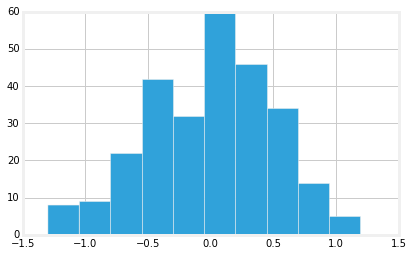

In [110]:
plt.hist(residuals_numpy)

The histogram looks reasonably good.

Now, let us extract the coeffiencts from the linear fit

In [118]:
coeffs = fit.rx2('coefficients')

In [119]:
print(coeffs)

(Intercept)     waiting 
-1.87401599  0.07562795 



In [120]:
type(coeffs)

rpy2.robjects.vectors.FloatVector

In [121]:
coeffs_python = pandas2ri.ri2py(coeffs)

In [122]:
coeffs_python

array([-1.87401599,  0.07562795])

Looks like we lost the names of columns (waiting, etc.) 

In [132]:
coeffs_python_names = pandas2ri.ri2py(coeffs.names).tolist()
coeffs_python_names

['(Intercept)', 'waiting']

Let us now extract the fitted value of `eruptions`

In [133]:
fit_eruptions = pandas2ri.ri2py(fit.rx2('fitted.values'))

Now, let us plot the true and the fitted eruptions in matplotlib.

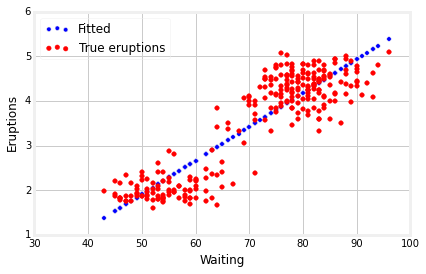

In [144]:
plt.scatter(faithful_pandas_df['waiting'], fit_eruptions, label='Fitted')
plt.scatter(faithful_pandas_df['waiting'], faithful_pandas_df['eruptions'], label='True eruptions', color='r')
plt.legend(loc='upper left')
plt.xlabel("Waiting")
plt.ylabel("Eruptions")

Now, let us predict using the learnt linear model on last five entries in the dataset.

In [145]:
last_5 = robjects.r['tail'](faithful_r_df, 5)

In [146]:
print(last_5)

    eruptions waiting
268     4.117      81
269     2.150      46
270     4.417      90
271     1.817      46
272     4.467      74



In [149]:
pred_r = stats.predict(fit, newdata=last_5)

In [150]:
print(pred_r)

     268      269      270      271      272 
4.251848 1.604870 4.932499 1.604870 3.722452 



In [173]:
pred_python = pandas2ri.ri2py(pred_r)
pred_python

array([ 4.2518478 ,  1.60486962,  4.93249933,  1.60486962,  3.72245216])

Great! Now that we are able to fit a model and also predict on it, let us now package this function similar to the scikit-learn API

In [186]:
class PYLM(object):
    from rpy2.robjects import pandas2ri
    pandas2ri.activate()
    from rpy2.robjects.packages import importr
    stats = importr('stats')
    def convert_fit_to_python(self, fit):
        coeffs_r = fit.rx2('coefficients')
        coeffs= pandas2ri.ri2py(coeffs_r)
        coeff_names =  pandas2ri.ri2py(coeffs_r.names).tolist()
        coeff_series = pd.Series({k:v for k,v in zip(coeff_names, coeffs)})
        fitted_values = pandas2ri.ri2py(fit.rx2('fitted.values'))
        return coeff_series
        
    def fit(self, relationship, df):
        """
        relationship: string of the form: a~b+c
        df: Pandas Dataframe
        """
        # Get R dataframe
        r_df = pandas2ri.py2ri(df)
        # Create linear fit
        fit = stats.lm(relationship, data=df)
        self.fit = fit
        python_fit = self.convert_fit_to_python(fit)
        return python_fit
    
    def predict(self, df):
        pred_r = stats.predict(self.fit, newdata=df)
        pred_python = pandas2ri.ri2py(pred_r)
        return pred_python
        
        

In [187]:
pylm = PYLM()
relationship='eruptions~waiting'
pylm.fit(relationship, faithful_pandas_df)

(Intercept)   -1.874016
waiting        0.075628
dtype: float64

In [188]:
pylm.predict(faithful_pandas_df.tail(5))

array([ 4.2518478 ,  1.60486962,  4.93249933,  1.60486962,  3.72245216])

Great, this means that we've now been able get the functionality of R's `lm` package! Now, let us take a more complex example, and this time let us do seasonal trend decomposition. I'll be following [this simple to follow tutorial](http://www.r-bloggers.com/seasonal-trend-decomposition-in-r/) for the R code.

In [200]:
stl = importr('decompose')

/Users/nipunbatra/anaconda/lib/python2.7/site-packages/rpy2/robjects/packages.py:438: UserWarning: Error in loadNamespace(name) : there is no package called ‘decompose’

  env = _get_namespace(rname)


RRuntimeError: Error in loadNamespace(name) : there is no package called ‘decompose’


In [206]:
print rdf

          X0         X1         X2           X3         X4
0 -0.1091990 -0.4848830  0.8114729  1.686629050 -0.8303842
1 -0.8341230 -1.2858001  1.4109684 -0.725307160  1.0727939
2  0.2908333  1.7781499  0.6380108 -0.811454278 -0.1356233
3 -0.3949959 -0.2403594 -0.2988791  0.659799210 -0.2285036
4  0.7849540 -0.8130649 -1.2866963 -0.008935847 -1.1553609
5 -1.8360065  0.7432235 -0.2666311  0.767711423  0.5746690
6 -0.3468995  0.8264074  0.2660812  0.123690417 -0.8806542
7 -1.2212734  0.9093955 -0.9404215  0.466499724 -0.4799235
8  0.5541671 -0.3874608 -0.5663260  1.278748625 -2.3360854
9  2.1494409 -0.2333825 -0.9514155 -0.223788233 -0.3636848



In [215]:
robjects.r['stl'](rdf.rx2('X0'))

/Users/nipunbatra/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in (function (x, s.window, s.degree = 0, t.window = NULL, t.degree = 1,  : 
  series is not periodic or has less than two periods

  res = super(Function, self).__call__(*new_args, **new_kwargs)


RRuntimeError: Error in (function (x, s.window, s.degree = 0, t.window = NULL, t.degree = 1,  : 
  series is not periodic or has less than two periods


In [216]:
a=rdf.rx2('X0')

In [229]:
import datetime
data = np.arange(85.) / 12.
data = np.sin(data * (2*np.pi))
data += np.arange(85.) / 12. * .5
data += .1 * np.random.randn(85)
idx = pd.DatetimeIndex(start=datetime.datetime(1999,1,1), freq='1M', periods=len(data))
data = pd.Series(data, index=idx)

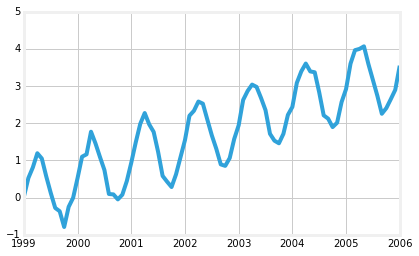

In [231]:
data.plot()

In [234]:
rd =pandas2ri.py2ri(data)

In [238]:
print rd.

<rpy2.rinterface.FloatSexpVector - Python:0x115bfade0 / R:0x1199b8b90>


In [237]:
robjects.r['stl'](rd, 12)

RRuntimeError: Error in (function (x, s.window, s.degree = 0, t.window = NULL, t.degree = 1,  : 
  series is not periodic or has less than two periods


In [224]:
robjects.r['stl'](nottem_ser,7)

RRuntimeError: Error in (function (x, s.window, s.degree = 0, t.window = NULL, t.degree = 1,  : 
  series is not periodic or has less than two periods
